In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

In [2]:
# HIDDEN
def joint(i, j):
    if i+j <= 3:
        mult = math.factorial(3)/(math.factorial(i)*math.factorial(j)*math.factorial(3-i-j))
        return mult*((1/6)**(i))*((2/6)**(j))*((3/6)**(3-i-j))
    else:
        return 0

die1 = range(4)
die56 = range(4)
dist1 = Table().values(die1, die56).probability_function(joint)

In [3]:
# HIDDEN
xx = [3, 4]
yy = [5, 6, 7]
pp = [0.1, 0.2, 0.3, 0.1, 0.2, 0.1]
dist2 = Table().values(xx, yy).probabilities(pp)

In [4]:
# HIDDEN
xxx = range(4)
yyy = range(5)
def p_ind(x, y):
    return stats.binom.pmf(x, 3, 1/2)*stats.binom.pmf(y, 4, 1/6)
dist3 = Table().values(xxx, yyy).probability_function(p_ind)

## Dependence and Independence ##

Conditional distributions help us formalize our intuitive ideas about whether two random variables are independent of each other. Let $X$ and $Y$ be two random variables, and suppose we are given the value of $X$. Does that change our opinion about $Y$? If the answer is yes, then we will say that $X$ and $Y$ are dependent. If the answer is no regardless of the given value of $X$, then we will say that $X$ and $Y$ are independent.

Let's start with some examples and then move to precise definitions and results.

### Dependence ###
Here is the joint distribution of two random variables $X$ and $Y$. From this, what can we say about whether $X$ and $Y$ are dependent or independent?

In [5]:
dist1

,X=0,X=1,X=2,X=3
Y=3,0.037037,0.000000,0.000000,0.00000
Y=2,0.166667,0.055556,0.000000,0.00000
Y=1,0.250000,0.166667,0.027778,0.00000
Y=0,0.125000,0.125000,0.041667,0.00463


You can see at once that if $X = 3$ then $Y$ can only be 0, whereas if $X = 2$ then $Y$ can be either 0 or 1. Knowing the value of $X$ changes the distribution of $Y$. That's dependence. 

Here is an example in which you can't quickly determine dependence or independence by just looking at the possible values.

In [6]:
dist2

,X=3,X=4
Y=7,0.3,0.1
Y=6,0.2,0.2
Y=5,0.1,0.1


But you can tell by looking at the conditional distributions of $X$ given $Y$. Two of them are the same, but the third is different. Knowing the value of $Y$ affects the chances for $X$. 

In [7]:
dist2.conditional_dist('X', 'Y')

,X=3,X=4,Sum
Dist. of X | Y=7,0.75,0.25,1.0
Dist. of X | Y=6,0.50,0.50,1.0
Dist. of X | Y=5,0.50,0.50,1.0
Marginal of X,0.60,0.40,1.0


It follows (and you should try to prove this), that at least some of the conditional distributions of $Y$ given the different values of $X$ will also be different from each other and from the marginal of $Y$.

In this example, all three conditional distributions of $Y$ given the three different values of $X$ are different from each other.

In [8]:
dist2.conditional_dist('Y', 'X')

,Dist. of Y | X=3,Dist. of Y | X=4,Marginal of Y
Y=7,0.500000,0.25,0.4
Y=6,0.333333,0.50,0.4
Y=5,0.166667,0.25,0.2
Sum,1.000000,1.00,1.0


### Independence ###

Here is a joint distribution table in which you can't immediately tell whether there is dependence. 

In [9]:
dist3

,X=0,X=1,X=2,X=3
Y=4,0.000096,0.000289,0.000289,0.000096
Y=3,0.001929,0.005787,0.005787,0.001929
Y=2,0.014468,0.043403,0.043403,0.014468
Y=1,0.048225,0.144676,0.144676,0.048225
Y=0,0.060282,0.180845,0.180845,0.060282


But look what happens when you condition $X$ on $Y$.

In [10]:
dist3.conditional_dist('X', 'Y')

,X=0,X=1,X=2,X=3,Sum
Dist. of X | Y=4,0.125,0.375,0.375,0.125,1.0
Dist. of X | Y=3,0.125,0.375,0.375,0.125,1.0
Dist. of X | Y=2,0.125,0.375,0.375,0.125,1.0
Dist. of X | Y=1,0.125,0.375,0.375,0.125,1.0
Dist. of X | Y=0,0.125,0.375,0.375,0.125,1.0
Marginal of X,0.125,0.375,0.375,0.125,1.0


All the rows are the same. That is, all the conditional distributions of $X$ given different values of $Y$ are the same, and hence are the same as the marginal of $X$ too. 

Given the value of $Y$, the probabilities for $X$ don't change at all. That's independence.

You could have drawn the same conclusion by conditioning $Y$ on $X$:

In [11]:
dist3.conditional_dist('Y', 'X')

,Dist. of Y | X=0,Dist. of Y | X=1,Dist. of Y | X=2,Dist. of Y | X=3,Marginal of Y
Y=4,0.000772,0.000772,0.000772,0.000772,0.000772
Y=3,0.015432,0.015432,0.015432,0.015432,0.015432
Y=2,0.115741,0.115741,0.115741,0.115741,0.115741
Y=1,0.385802,0.385802,0.385802,0.385802,0.385802
Y=0,0.482253,0.482253,0.482253,0.482253,0.482253
Sum,1.000000,1.000000,1.000000,1.000000,1.000000


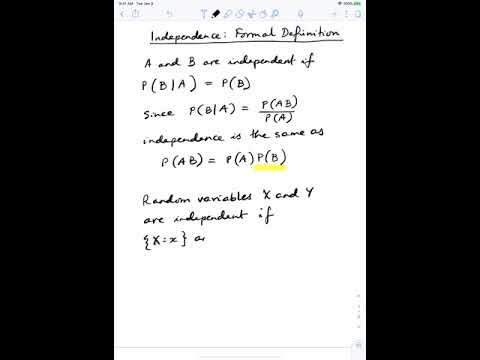

In [12]:
# VIDEO: Independence: Formal Definition
from IPython.display import YouTubeVideo

YouTubeVideo("zjKrjQJzqQ4")

### Independence of Two Events ###
The concept of independence seems intuitive, but it is possible to run into trouble by not being careful about its definition. So let's define it formally.

There are two equivalent definitions of the independence of two events. The first encapsulates the main idea of independence, and the second is useful for calculation.

Two events $A$ and $B$ are *independent* if $P(B \mid A) = P(B)$. Equivalently, $A$ and $B$ are independent if $P(AB) = P(A)P(B)$.

### Independence of Two Random Variables ###
What we have observed in the examples of this section can be turned into a formal definition of independence.

Two random variables $X$ and $Y$ are *independent* if for every value $x$ of $X$ and $y$ of $Y$,

$$
P(Y = y \mid X = x) = P(Y = y)
$$

That is, no matter what the given $x$ is, the conditional distribution of $Y$ given $X=x$ is the same as if we didn't know that $X=x$.

Equivalently (this needs a proof, which consists of a routine application of definitions), for every $y$ the conditional distribution of $X$ given $Y=y$ is the same as if we didn't know that $Y=y$.

An equivalent definition in terms of the independence of events is that for any values of $x$ and $y$, the events $\{ X=x\}$ and $\{Y=y\}$ are independent. 

That is, $X$ and $Y$ are independent if for any values $x$ of $X$ and $y$ of $Y$, 

$$
P(X = x, Y = y) ~ = ~ P(X=x)P(Y=y) 
$$

Independence simplifies the conditional probabilities in the multiplication rule.

It is a fact that if $X$ and $Y$ are independent random variables, then any event determined by $X$ is independent of any event determined by $Y$. For example, if $X$ and $Y$ are independent and $x$ is a number, then $\{X=x\}$ is independent of $\{Y>x\}$. Also, any function of $X$ is independent of any function of $Y$.

You can prove these facts by partitioning and then using the definition of independence. The proofs are routine but somewhat labor intensive. You are welcome to just accept the facts if you don't want to prove them.

### Mutual Independence ###
Events $A_1, A_2, \ldots A_n$ are *mutually independent* (or *independent* for short) if given that any subset of the events has occurred, the conditional chances of all other subsets remain unchanged.

That's quite a mouthful. In practical terms it means that it doesn't matter which of the events you know have happened; chances involving the remaining events are unchanged.

In terms of random variables, $X_1, X_2, \ldots , X_n$ are independent if given the values of any subset, chances of events determined by the remaining variables are unchanged.

In practice, this just formalizes statements such as "results of different tosses of a coin are independent" or "draws made at random with replacement are independent".

Try not to become inhibited by the formalism. Notice how the theory not only supports intuition but also develops it. You can expect your probabilistic intuition to be much sharper at the end of this course than it is now!

### IID Random Variables ###
If random variables are mutually independent and identically distributed, they are called "i.i.d." That's one of the most famous acronyms in probability theory. You can think of i.i.d. random variables as draws with replacement from a population, or as the results of independent replications of the same experiment.

Calculations involving i.i.d. random variables are often straightforward. For example, suppose the distribution of $X$ is given by

$$
P(X = i) = p_i, ~~~ i = 1, 2, \ldots, n
$$

where $\sum_{i=1}^n p_i = 1$. Now let $X$ and $Y$ be i.i.d. What is $P(X = Y)$? We'll answer this question by using the fundamental method, now in random variable notation.

$$
\begin{align*}
P(X = Y) ~ &= ~ \sum_{i=1}^n P(X = i, Y = i) ~~~ \text{(partitioning)} \\
&= ~ \sum_{i=1}^n P(X = i)P(Y = i) ~~~ \text{(independence)} \\
&= ~ \sum_{i=1}^n p_i \cdot p_i ~~~ \text{(identical distributions)} \\
&= ~ \sum_{i=1}^n p_i^2
\end{align*}
$$

The last expression is easy to calculate if you know the numerical values of all the $p_i$.

```{admonition} Quick Check
Let $V$ have distribution $P(V = i) = p_i$ for $2 \le i \le 6$, where $\sum_{i=2}^6 p_i = 1$.

If $V$ and $W$ are i.i.d., find $P(V = 2W)$.

```

```{admonition} Answer
:class: dropdown
$p_4p_2 + p_6p_3$

```